In [1]:
#import git
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [2]:
#! git clone https://github.com/Thiag0car/Costume-Trends-Scraper

In [3]:
df = pd.read_csv(r"C:\Users\danyu\Desktop\Trabalho_Savino\Costume-Trends-Scraper\Web Scraping\Redes Sociais Scraping\textos_redes_sociais.csv")

In [4]:
df.head()

,Texto,Data,Redes Sociais,sentimento
0,Olá gente linda! no Vídeo estou fazendo uma pa...,2023-05-26 05:52 AM,youtube.com,Positive
1,Video can be found here,2023-05-26 05:42 AM,youtube.com,Negative
2,Aô época boa sô 🌽 🌾 #festajunina #docesjuninos...,2023-05-26 05:42 AM,tiktok.com,Positive
3,muito pra o sao joao? falta muito pra o sao jo...,2023-05-26 05:41 AM,twitter.com,Neutral
4,seus frescurentos #vaiprofy #festajunina #vaip...,2023-05-26 05:31 AM,tiktok.com,Neutral


In [5]:
df['Redes Sociais'].unique()

array(['youtube.com', 'tiktok.com', 'twitter.com', 'www2.bauru.sp.gov.br',
       'waldineypassos.com.br', 'emsergipe.com.br', '7minutos.com.br',
       'br.freepik.com', 'dpontanews.com.br', 'revolucaodesabores.com',
       'peleja.blog.br', 'olhandoatento.blogspot.com',
       'jornalgrandebahia.com.br', 'blognossavoz.com.br',
       'jornalzonasul.com.br', 'davidgomesbalancas.wordpress.com',
       'abelhaonoticias.blogspot.com', 'globoplay.globo.com',
       'utahroadsafety.com', 'audioativo.com', 'ifolharegional.com.br',
       'terra.com.br', 'jornalopiniao.net', 'fashionbubbles.com',
       'sopacultural.com', 'sergipepress.com.br', 'hojepr.com',
       'fabionoticiasdacidade.blogspot.com', 'osollo.com.br',
       'blogalangoncalves.net', 'itatiaia.com.br', 'sampi.net.br',
       'cornershopapp.com', 'novoblogdodimitri.blogspot.com',
       'ailtonpitombo.com.br', 'qualidadedevidanocampo.blogspot.com',
       'bilhetedanoticia.blogspot.com', 'blogdofinfa.com.br',
       'correio

In [6]:
# Função para contar as palavras onde há ocorrencia de de 'festa' e 'junina', criando novas colunas onde foram utilizadas
def contar_palavras(texto):
    palavras = re.findall(r'\w+', texto.lower())
    contagem = {'festa': 0, 'junina': 0}
    for palavra in palavras:
        if palavra == 'festa':
            contagem['festa'] += 1
        elif palavra == 'junina':
            contagem['junina'] += 1
    return contagem['festa'], contagem['junina']

In [7]:
# Função para contar a frequencia de todas as palavras encontradas, filtrando palavras inuteis, como a, o, os, de, etc...
def todas_palavras(texto):
    stop_words = set(stopwords.words('portuguese'))
    palavras = re.findall(r'\w+', texto.lower())
    palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words]
    contagem = Counter(palavras_filtradas)
    return contagem

In [8]:
# Função para encontrar o termo festa junina
def contar_festa_junina(texto):
    ocorrencias = re.findall(r'festa junina', texto.lower())
    return len(ocorrencias)

In [14]:
#Inclusão de colunas ao df original, com a contagem das palavras

df['Festa'] = df['Texto'].apply(lambda x: contar_palavras(x)[0])
df['Junina'] = df['Texto'].apply(lambda x: contar_palavras(x)[1])
df['Contagem_FJ'] = df['Texto'].apply(contar_festa_junina)

In [20]:
df.head()

,Texto,Data,Redes Sociais,sentimento,Festa,Junina,Contagem_FJ
0,Olá gente linda! no Vídeo estou fazendo uma pa...,2023-05-26 05:52 AM,youtube.com,Positive,0,0,0
1,Video can be found here,2023-05-26 05:42 AM,youtube.com,Negative,0,0,0
2,Aô época boa sô 🌽 🌾 #festajunina #docesjuninos...,2023-05-26 05:42 AM,tiktok.com,Positive,0,0,0
3,muito pra o sao joao? falta muito pra o sao jo...,2023-05-26 05:41 AM,twitter.com,Neutral,0,0,0
4,seus frescurentos #vaiprofy #festajunina #vaip...,2023-05-26 05:31 AM,tiktok.com,Neutral,0,0,0


In [9]:
# Criação de lista com as palavras mais utililizadas, com a contagem da frequencia

total = Counter()
  
for texto in df['Texto']:
    total += todas_palavras(texto)

frequentes = total.most_common()

frequentes = sorted(frequentes, key=lambda x: x[1], reverse=True)

In [13]:
frequentes

[('festa', 725),
 ('junina', 644),
 ('festajunina', 374),
 ('pamonha', 281),
 ('saojoao', 262),
 ('milho', 259),
 ('be', 227),
 ('video', 226),
 ('can', 224),
 ('found', 223),
 ('here', 223),
 ('joão', 175),
 ('junho', 154),
 ('fazer', 149),
 ('quentão', 142),
 ('https', 127),
 ('1', 126),
 ('dia', 125),
 ('festas', 110),
 ('2023', 99),
 ('xadrez', 97),
 ('tradicional', 97),
 ('camisa', 93),
 ('melhor', 90),
 ('juninas', 85),
 ('sao', 81),
 ('2', 80),
 ('bolo', 79),
 ('curau', 79),
 ('ano', 76),
 ('pra', 74),
 ('fy', 72),
 ('evento', 71),
 ('receita', 70),
 ('fyp', 70),
 ('joao', 69),
 ('comidas', 68),
 ('além', 67),
 ('quadrilha', 66),
 ('viral', 65),
 ('canjica', 62),
 ('vai', 62),
 ('forró', 61),
 ('leite', 61),
 ('ingredientes', 59),
 ('verde', 58),
 ('feira', 57),
 ('bem', 56),
 ('3', 56),
 ('pode', 56),
 ('brasil', 55),
 ('aqui', 55),
 ('dias', 54),
 ('maior', 54),
 ('junino', 53),
 ('receitas', 53),
 ('típicas', 52),
 ('grande', 51),
 ('arraiá', 51),
 ('pé', 51),
 ('saojoaonotik

In [19]:
#Criação de DF a partir da lista de palavras

df_frequentes = pd.DataFrame(frequentes, columns=['Palavra', 'Frequência'])
df_frequentes

,Palavra,Frequência
0,festa,725
1,junina,644
2,festajunina,374
3,pamonha,281
4,saojoao,262
...,...,...
7407,frevomulher,1
7408,brevet,1
7409,queluz,1
7410,comemoramos,1


In [11]:
#!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

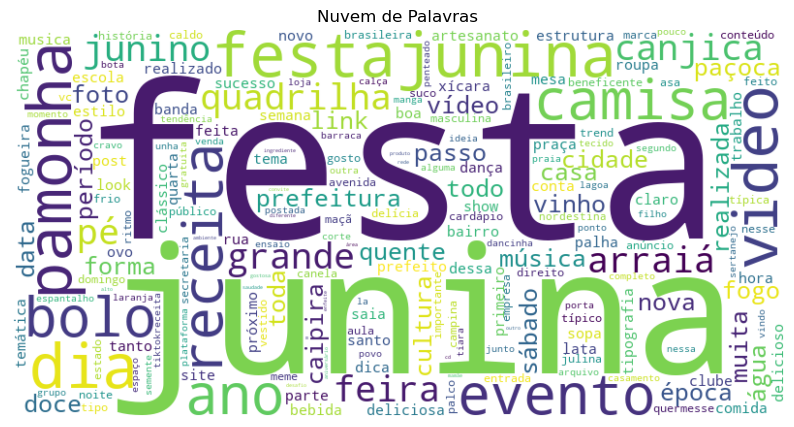

In [12]:
# Criação de wordcloud das palavras mais utilizadas
text_cloud = ' '.join(df_frequentes['Palavra'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()


In [16]:
df['Contagem_FJ'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [17]:
df.corr()

C:\Users\danyu\AppData\Local\Temp\ipykernel_16416\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Festa,Junina,Contagem_FJ
Festa,1.000000,0.866457,0.900770
Junina,0.866457,1.000000,0.949028
Contagem_FJ,0.900770,0.949028,1.000000


In [18]:
# Contagem do termo festa junina de acordo com cada rede social

tabela = pd.crosstab(df['Redes Sociais'], df['Contagem_FJ'])
tabela.sort_values(by=1, ascending=False)

Contagem_FJ,0,1,2,3,4,5
Redes Sociais,,,,,,
tiktok.com,463,58,2,0,0,0
youtube.com,414,48,2,0,0,0
twitter.com,71,15,0,0,0,0
davidgomesbalancas.wordpress.com,3,5,0,0,0,0
terra.com.br,4,5,2,0,0,0
...,...,...,...,...,...,...
gracalayouts.blogspot.com,0,0,1,0,0,0
hojepr.com,1,0,1,0,0,0
infor-pub.com,0,0,0,0,1,0
